In [ ]:
pip install python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 39.1 MB/s eta 0:00:00


In [ ]:
import Levenshtein

def calculate_cognate_score(row):
    bolinao = str(row['word']).lower().strip()
    filipino = str(row['meaning_filipino']).lower().strip().split()[0]
    dist = Levenshtein.distance(bolinao, filipino)
    max_len = max(len(bolinao), len(filipino))
    if max_len == 0: return 0
    similarity = 1 - (dist / max_len)
    return similarity

df['cognate_score'] = df.apply(calculate_cognate_score, axis=1)
cognates = df[df['cognate_score'] > 0.7]
print(f"Potential Tagalog Cognates Found: {len(cognates)}")
print(cognates[['word', 'meaning_filipino', 'cognate_score']].head(10))
cognates.to_csv("bolinao_tagalog_cognates.csv", index=False)

Potential Tagalog Cognates Found: 3415
        word  meaning_filipino  cognate_score
16     abaho            Abaho.       0.833333
17     abaka            Abaka.       0.833333
18   abakada          Abakada.       0.875000
19     abako            Abako.       0.833333
22  abaluryo  Abaloryo; manik.       0.777778
23   abaniko          Abaniko.       0.875000
24     abano            Abano.       0.833333
25    abanti           Abante.       0.714286
54     abiso    Abiso; babala.       0.833333
55  abisuwan         Abisuhan.       0.777778


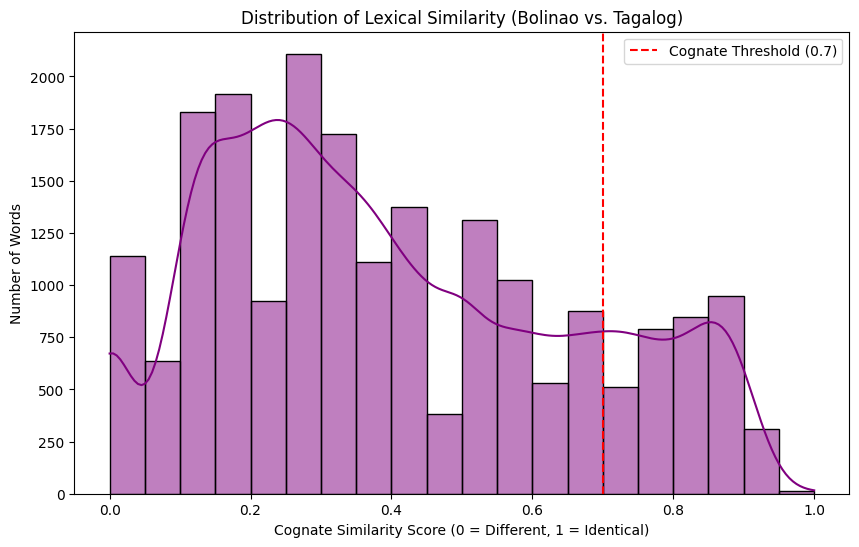

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['cognate_score'], bins=20, kde=True, color='purple')

plt.title("Distribution of Lexical Similarity (Bolinao vs. Tagalog)")
plt.xlabel("Cognate Similarity Score (0 = Different, 1 = Identical)")
plt.ylabel("Number of Words")
plt.axvline(x=0.7, color='red', linestyle='--', label='Cognate Threshold (0.7)')
plt.legend()
plt.show()